# Project 1: Create a project for Spam email classification
## Spam email classifier
Dataset:
https://drive.google.com/file/d/11dlUIHgx0b32sRwt68rIggpIrbqzvBqB/view?usp=sharing
###Objective of the project - To create a classifier that helps classify between Spam (unimportant) mail & Ham (important) mail
Feel free to do any text cleaning and feature engineering required.

Compare using both ML & DL model approaches for the purpose.

---

## Steps

1.   Data Colllection and preparation:Gather and prepare the data for analysis.
2.   Exploratory Data Analysis: Understand, analyse data and summarize main caracteristics.
3.   Feature engineering: Create, delete features for opptimal modeling.
4.   Model development: Develop and train various machine learning models.
5.   Model evaluation: Meassure how well the model performs itss task.
6.   Validation: Test the model on new data.








---

## I.- Import libraries


- Importing essential libraries needed for data analysis, visualization, and machine learning tasks. It imports numpy and pandas, which are fundamental for handling numerical data and data frames, respectively.
- For visualization, matplotlib.pyplot and seaborn are imported, providing tools for creating a wide range of static plots.
- The train_test_split function from the sklearn.model_selection module is brought in to facilitate the division of the dataset into training and testing subsets, crucial for model evaluation.
- classification_report and confusion_matrix from sklearn.metrics, which are used to assess the performance of classification models by generating detailed reports and confusion matrices, respectively.
- Importing the Natural Language Toolkit (nltk) library. It imports the stopwords module from nltk.corpus, which provides a collection of common stop words that can be filtered out during text processing to improve the efficiency of NLP tasks.
-Import the re module for working with regular expressions
-Import the Counter class from the collections module. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # type: ignore
import seaborn as sb # type: ignore
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score # Import cross-validation score evaluation function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB # Importing the Multinomial Naive Bayes classifier from scikit-learn
from sklearn.linear_model import LogisticRegression # Importing the Logistic Regression classifier from scikit-learn
from sklearn import preprocessing # Importing preprocessing module from sklearn
import nltk
from nltk.corpus import stopwords
# Download the stopwords dataset from nltk
nltk.download('stopwords')
import re
from collections import Counter  # Import the Counter class from the collections module


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---

## II .- Functions definition

- In a simple project with only a few functions it is a good practice to define them at the beginning of your notebook.

In [31]:
# Funcion para tokenizar los emails
def prepare_df(text):
  text = re.sub('[^a-zA-Z]', ' ', text.lower()) # Remove chars and convert to lowercase
  text = re.sub(r"\W", " ", text) # Replace any non word character with a space
  text = re.sub(r"\s+", " ", text) # remove extra white spaces
  tokens = text.split()
  return tokens


- "prepare_df" is a function to remove non word characters and tokenize each resulting email text.

---

## III.- Data Collection and preparation

- At first, load the dataset into a DataFrame using the Pandas library in Python. This is the first step in data exploration and preprocessing. It enables us to perform various operations, such as cleaning, transforming, and analyzing the data.

In [32]:
df = pd.read_csv('D:\DESARROLLOS_EN_GITHUB\email_classifier\Hamspam.csv', encoding='latin-1')
df.head()
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


---

##IV.- Exploratory Data Analysis
Afterward, checked the structure and missing values to prepare the data for further processing and modeling. Besides, calculate descriptive statistics to give a summary of the data and help in understanding its characteristics. They are useful for identifying trends, outliers, and the overall distribution of the data.

### 1. DataFrame Inspection

- Upon loading the dataset into a DataFrame, it is important to review its structure. This includes checking the column names to understand what features are present, verifying data types (e.g., numeric, categorical, text), and inspecting a sample of data entries to get an initial sense of the data.

In [33]:
df.head(5)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [34]:
df.tail()

,type,text
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [35]:
df.shape

(5559, 2)

In [36]:
df.columns

Index(['type', 'text'], dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [38]:
df.isnull().sum()

type    0
text    0
dtype: int64

#### 2. Observation after DataFrame Inspection

- By observing the dataset, see that it consists of 5559 emails represented as rows, two columns for text email and type (ham, spam).
- For ease, it will be better to incorporate "type" along with the text of each email, since it will be necessary to convert each word into a "feature".
- Also, "type" will be renamed to "Target"

In [39]:
data_list =[]
type_index = 0
for text in df['text']:
  tokens = prepare_df(text) # Call "prepare_df" function defined in II
  word_counts = Counter(tokens) # Count word frequencies
  data = {word: count for word, count in word_counts.items()} # Create a dictionary for the current email's word frequencies
  data['Target'] = 1 if df['type'][type_index] == 'spam' else 0 # Rename column "type" to "Target" and replace "ham" with 0 and spam with 1
  type_index += 1
  data_list.append(data)
df = pd.DataFrame(data_list)




In [40]:
df

,hope,you,are,having,a,good,week,just,checking,in,...,blanket,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,NaN,3.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5556,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0


In [41]:
df.fillna(0, inplace=True) # fill NaN with 0

In [42]:
df

,hope,you,are,having,a,good,week,just,checking,in,...,blanket,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0


In [43]:
df.columns

Index(['hope', 'you', 'are', 'having', 'a', 'good', 'week', 'just', 'checking',
       'in',
       ...
       'blanket', 'sang', 'uptown', 'pounded', 'young', 'diesel', 'jsco',
       'leadership', 'skills', 'psychic'],
      dtype='object', length=7737)

In [44]:
df.dtypes

hope          float64
you           float64
are           float64
having        float64
a             float64
               ...   
diesel        float64
jsco          float64
leadership    float64
skills        float64
psychic       float64
Length: 7737, dtype: object

In [45]:
df['spam']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5554    0.0
5555    0.0
5556    0.0
5557    0.0
5558    0.0
Name: spam, Length: 5559, dtype: float64

In [46]:
df.iloc[0,:]

hope          1.0
you           1.0
are           1.0
having        1.0
a             1.0
             ... 
diesel        0.0
jsco          0.0
leadership    0.0
skills        0.0
psychic       0.0
Name: 0, Length: 7737, dtype: float64

In [47]:
df.loc[:, ['ham', 'spam']] # Just checking if "ham" and "spam" are in email text (now as columns)

,ham,spam
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
5554,0.0,0.0
5555,0.0,0.0
5556,0.0,0.0
5557,0.0,0.0


In [48]:
df.loc[:, 'spam']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5554    0.0
5555    0.0
5556    0.0
5557    0.0
5558    0.0
Name: spam, Length: 5559, dtype: float64

In [49]:
df['Target'].dtypes

dtype('int64')

In [50]:
df.loc[:, ["Target"]].isnull().sum()

Target    0
dtype: int64

In [51]:
df.iloc[[0]]

,hope,you,are,having,a,good,week,just,checking,in,...,blanket,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Move Target column to the end
df = df[[col for col in df.columns if col != 'Target'] + ['Target']]
print(df)

      hope  you  are  having    a  good  week  just  checking   in  ...  sang  \
0      1.0  1.0  1.0     1.0  1.0   1.0   1.0   1.0       1.0  1.0  ...   0.0   
1      0.0  0.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
2      0.0  0.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  1.0  ...   0.0   
3      0.0  0.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
4      0.0  0.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
...    ...  ...  ...     ...  ...   ...   ...   ...       ...  ...  ...   ...   
5554   0.0  3.0  2.0     0.0  4.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
5555   0.0  0.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
5556   0.0  1.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
5557   0.0  0.0  0.0     0.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   
5558   0.0  0.0  0.0     1.0  0.0   0.0   0.0   0.0       0.0  0.0  ...   0.0   

      uptown  pounded  youn

In [53]:
df.columns


Index(['hope', 'you', 'are', 'having', 'a', 'good', 'week', 'just', 'checking',
       'in',
       ...
       'sang', 'uptown', 'pounded', 'young', 'diesel', 'jsco', 'leadership',
       'skills', 'psychic', 'Target'],
      dtype='object', length=7737)

In [54]:
df.head()

,hope,you,are,having,a,good,week,just,checking,in,...,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic,Target
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [55]:
df.describe()

,hope,you,are,having,a,good,week,just,checking,in,...,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic,Target
count,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,...,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000
mean,0.020507,0.402411,0.089045,0.007375,0.262817,0.044432,0.022666,0.067458,0.001979,0.162979,...,0.000180,0.000180,0.000180,0.000180,0.000180,0.000360,0.000180,0.000180,0.000180,0.134377
std,0.144257,0.797261,0.322739,0.085571,0.560327,0.218777,0.168147,0.259301,0.044443,0.415242,...,0.013412,0.013412,0.013412,0.013412,0.013412,0.026825,0.013412,0.013412,0.013412,0.341087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,14.000000,5.000000,1.000000,4.000000,3.000000,3.000000,3.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df['Target'].value_counts()

Target
0    4812
1     747
Name: count, dtype: int64

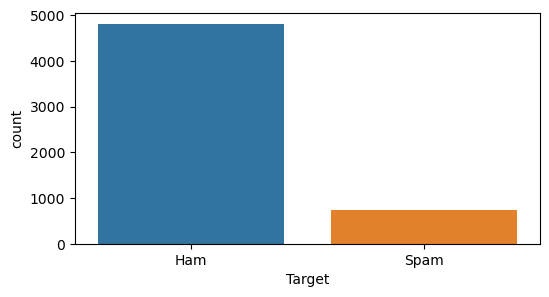

In [57]:
plt.figure(figsize=(6, 3))
sb.countplot(x = 'Target',
            data = df)
plt.xticks([1,0],['Spam','Ham'])
plt.show()

- Analyzing the distribution of the target labels (ham vs. spam) helps understand the balance of the dataset.
- Dataset is imbalanced, meaning there are significantly more ham emails than spam ones.
- This imbalance can affect the performance of classification algorithms, as they might be biased towards the majority class (ham).

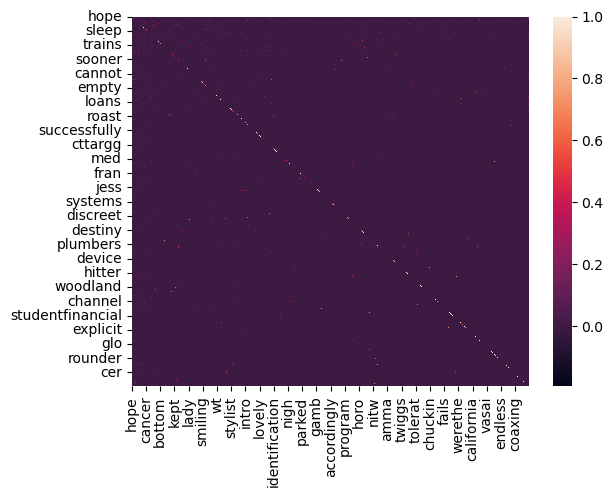

In [58]:
# Plotting correlation heatmap
dataplot = sb.heatmap(df.corr(numeric_only=True))

# Displaying heatmap
plt.show()

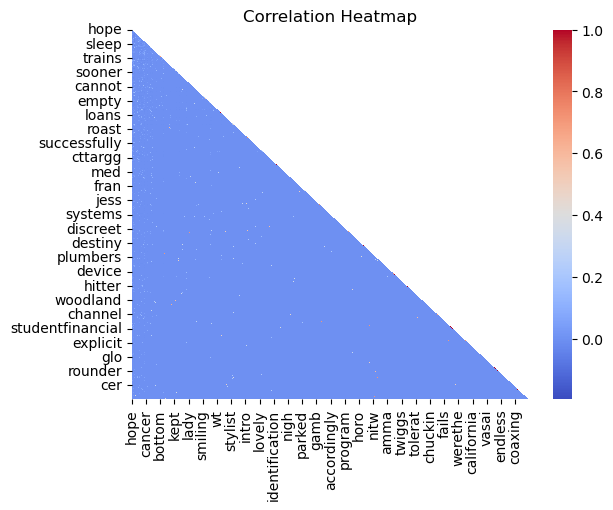

In [59]:
# Calculate the correlation matrix for the numeric columns in the dataset.
correlation_matrix = df.corr()

# Build a matrix of booleans (True, False) with the same shape as the data
ones_corr = np.ones_like(correlation_matrix, dtype=bool)

# The variable mask now contains the upper triangular matrix mask created in the previous step
mask = np.triu(ones_corr)

# Create a heatmap to visualize the correlation matrix.
sb.heatmap(correlation_matrix, mask=mask, annot=False, cmap="coolwarm")

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

---

## V.- Data Modelling

- Begin by applying a simple model to evaluate the performance of the data.
- This initial step involves using basic machine learning algorithms to establish a baseline for model performance.
- By assessing how well these simple models perform, can evaluate the effectiveness of the data and identify potential areas for improvement.
- This baseline also allows us to compare more complex models and techniques, ensuring that any advancements in performance are meaningful and not just a result of overfitting or data leakage.

### 1. Train-Test Sets Preparation

#### a. Create a new dataframe X by dropping the 'Target' Column from the original dataframe

In [60]:
X = df.drop('Target', axis=1)
X

,hope,you,are,having,a,good,week,just,checking,in,...,blanket,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0


#### b. Extract the 'Target' column from the original dataframe and store it in a new variable y.

In [61]:
y = df['Target']
y

0       0
1       0
2       0
3       1
4       1
       ..
5554    0
5555    0
5556    1
5557    1
5558    0
Name: Target, Length: 5559, dtype: int64

#### c. Split the data into training and test sets

In [62]:
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state is a parameter in train_test_split that controls the random number generator
# used to shuffle the data before splitting it.
# there's no specific reason to use the number 42 over any other value as the random_state parameter.
# The purpose of setting a random seed (using random_state) in machine learning is to ensure reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting training and test sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Test Labels Shape: {y_test.shape}")

Training Features Shape: (4447, 7736)
Training Labels Shape: (4447,)
Test Features Shape: (1112, 7736)
Test Labels Shape: (1112,)


In [63]:
# Determine the number of features (columns) in the DataFrame X
# Determine the unique classes in the Series y and assign it to n_classes
n_features, n_classes = X.shape[1], np.unique(y)

# Display the number of features and the unique classes
n_features, n_classes

(7736, array([0, 1], dtype=int64))

### 2. Apply Naive Bayes

- At first, apply the Naive Bayes algorithm because it is well-suited for text classification tasks, where each email is represented by word counts (or frequencies) of the most common words.
- MultinomialNB is chosen because it works with features that represent counts, which aligns with the dataset structure where each cell represents the count of a specific word in an email.
- Besides, MultinomialNB naturally supports binary classification tasks, where the goal is to predict whether an email is spam (0) or not ham (1)

In [64]:
nb=MultinomialNB() # Instantiate Naive Bayes
nb.fit(X_train, y_train) # Train (fit) the classifier on training data

MultinomialNB()

In [65]:
# Use the trained Naive Bayes classifier to predict the labels of the test data
y_pred_nb = nb.predict(X_test)

In [66]:
# Print the classification report, which includes precision, recall, F1-score, and support for each class
print("Classification report: ")
print(classification_report(y_test, y_pred_nb))

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       963
           1       0.88      0.91      0.89       149

    accuracy                           0.97      1112
   macro avg       0.93      0.94      0.94      1112
weighted avg       0.97      0.97      0.97      1112



#### Explanation of Each Metric Result When Applying Multinomial Naive Bayes

- Precision: This measures the accuracy of positive predictions made by the model. For class 0 (not spam), the precision is 0.99, indicating that 99% of emails predicted as not spam were actually not spam. For class 1 (spam), the precision is 0.88, meaning that 88% of emails predicted as spam were actually spam.
- Recall: It measures the proportion of actual positives that were correctly identified by the model. For class 0, the recall is 0.98, indicating that 98% of actual not spam emails were correctly identified as not spam. For class 1, the recall is 0.91, meaning that 91% of actual spam emails were correctly identified as spam.
- F1-score: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall. The F1-score for class 0 is 0.98, and for class 1, it is 0.89.
- Support: Support is the number of actual occurrences of each class in the test dataset. In this case, there are 963 instances of class 0 (not spam) and 149 instances of class 1 (spam).
- Accuracy: Accuracy measures the overall correctness of the model's predictions across all classes. Here, the overall accuracy is 0.97, meaning that the model correctly predicted 97% of the emails in the test set.

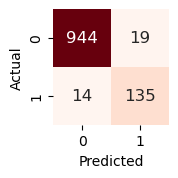

In [67]:
# Compute the confusion matrix to evaluate the performance of the Naive Bayes classifier
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Create a DataFrame from the confusion matrix with labels for rows and columns
df_cm_nb = pd.DataFrame(cm_nb, columns=np.unique(y_test), index=np.unique(y_test))

# Set the names for the index (rows) and columns of the DataFrame
df_cm_nb.index.name = 'Actual'
df_cm_nb.columns.name = 'Predicted'

# Create a new figure for the heatmap with a specific size
plt.figure(figsize=(1.5, 1.5))

# Generate a heatmap visualization of the confusion matrix
sb.heatmap(df_cm_nb, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

# Display the heatmap
plt.show()

#### Discussion of Applying Multinomial Naive Bayes

- By observing the confusion matrix, find that reducing false positives for class 1 (spam) predictions is necessary.
- Multinomial Naive Bayes was initially chosen because it is well-suited for text classification tasks where features (word counts or frequencies) are non-negative integers. Given the class, it assumes that features are conditionally independent, which can work reasonably well for word count data.

### 3. Apply Logistic Regression

- Then apply the Logistic Regression because Logistic Regression can capture more complex relationships between features and the target variable compared to the assumption of independence in Multinomial Naive Bayes.
- Multinomial Naive Bayes assumes that features (word counts) are conditionally independent given the class label (spam or not spam). This means that the presence of one word is independent of the presence of other words, which is often not true in real-world text data because the occurrence of words in emails could be correlated or have complex interactions that Logistic Regression can potentially model more accurately.
- Logistic Regression, on the other hand, models the relationship between the features (word counts) and the probability of each class (spam or not spam) using a logistic function.

In [68]:
# Initializing the Logistic Regression model with a fixed random state for reproducibility
# The max_iter parameter is set to 1000 to ensure the solver has sufficient iterations to converge
reg_log = LogisticRegression(random_state=42, max_iter=1000)

# Training the Logistic Regression model on the training data (X_train and y_train)
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [69]:
# Predict the labels for the test data using the trained Logistic Regression model
y_pred_reg_log = reg_log.predict(X_test)

In [70]:
# Print the classification report to evaluate the performance of the Logistic Regression model
print("Classification report: ")
print(classification_report(y_test, y_pred_reg_log))

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.98      0.89      0.93       149

    accuracy                           0.98      1112
   macro avg       0.98      0.94      0.96      1112
weighted avg       0.98      0.98      0.98      1112



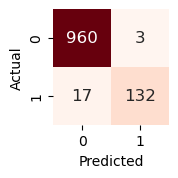

In [71]:
# Compute the confusion matrix to evaluate the performance of the Logistic Regression model
cm_reg_log = confusion_matrix(y_test, y_pred_reg_log)

# Create a DataFrame for the confusion matrix with appropriate labels for rows and columns
df_cm_reg_log = pd.DataFrame(cm_reg_log, columns=np.unique(y_test), index = np.unique(y_test))

# Set names for the index (rows) and columns of the DataFrame
df_cm_reg_log.index.name = 'Actual'
df_cm_reg_log.columns.name = 'Predicted'

# Create a new figure for the heatmap with specified dimensions
plt.figure(figsize = (1.5,1.5))

# Generate a heatmap for the confusion matrix with annotations and custom formatting
sb.heatmap(df_cm_reg_log, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

# Display the heatmap
plt.show()

### 4. Comparison of Two Models: Multinomial Naive Bayes and Logistic Regression

- Accuracy: Logistic Regression has a higher accuracy (0.98) than Multinomial Naive Bayes (0.97).
- Precision: For Class 0, Naive Bayes (0.99) performs better than Loistic eesssion (0.98), but for Class 1, Logistic Regression (0.98) has higher precision than Multinomial Naive Bayes (0.88).
- Recall: For Class 0, Logistic Regression has a better recall (1.0) than Multinomial Naive Bayes (0.98).
- F1-Score: Logistic Regression has a better f1-score for both classes.

Therefore, Logistic Regression performs better than MultinomialNB across most metrics.

---

## VI.- Improve the Performance of the Logistic Regression Model by Feature Engineering

### 1. Remove Stop Words

- Stop words are common words that appear frequently in a text but carry little meaningful information, such as "the," "is," "in," "and," etc.
- Removing these words can improve the performance of machine learning models by reducing noise and dimensionality, leading to more meaningful feature representation and potentially better classification results.

In [72]:
# Import the list of stop words from the NLTK library
stop_words = list(stopwords.words('english'))

# Print the list of stop words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
# Remove the stop words columns from the DataFrame
# The 'errors="ignore"' parameter ensures that non-existent columns are ignored
df_filtered_sw = df.drop(stop_words, axis=1, errors="ignore")

# Display the resulting DataFrame after stop words removal
df_filtered_sw

,hope,good,week,checking,k,give,back,thanks,also,cbe,...,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic,Target
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5556,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1


In [74]:
# Create a new DataFrame X_filtered_sw by dropping the 'Target' column from df_filtered_sw
X_filtered_sw = df_filtered_sw.drop("Target", axis=1)

# Display X_filtered_sw, which now contains the filtered features after stop words removal
X_filtered_sw

,hope,good,week,checking,k,give,back,thanks,also,cbe,...,blanket,sang,uptown,pounded,young,diesel,jsco,leadership,skills,psychic
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0


In [75]:
# Create a new Series y_filtered_sw containing the 'Target' column from df_filtered_sw
y_filtered_sw = df_filtered_sw["Target"]

# Display y_filtered_sw, which now contains the labels after stop words removal
y_filtered_sw

0       0
1       0
2       0
3       1
4       1
       ..
5554    0
5555    0
5556    1
5557    1
5558    0
Name: Target, Length: 5559, dtype: int64

#### Split the Filtered Dataset Into Training and Testing Sets

In [76]:
X_train_filtered_sw, X_test_filtered_sw, y_train_filtered_sw, y_test_filtered_sw = train_test_split(X_filtered_sw, y_filtered_sw, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print(X_train_filtered_sw.shape, y_train_filtered_sw.shape, X_test_filtered_sw.shape, y_test_filtered_sw.shape)

(4447, 7592) (4447,) (1112, 7592) (1112,)


#### Apply Logistic Regression

In [77]:
# Initialize a Logistic Regression model with specified random state and maximum iterations
reg_log_filtered_sw = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression model on the filtered training data
reg_log_filtered_sw.fit(X_train_filtered_sw, y_train_filtered_sw)

LogisticRegression(max_iter=1000, random_state=42)

In [78]:
# Predict the labels for the filtered test data using the trained Logistic Regression model
y_pred_reg_log_filtered_sw = reg_log_filtered_sw.predict(X_test_filtered_sw)

In [79]:
# Print a header for the classification report
print("Classification report: ")

# Print the classification report to evaluate the performance of the Logistic Regression model
print(classification_report(y_test_filtered_sw, y_pred_reg_log_filtered_sw))

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.98      0.85      0.91       149

    accuracy                           0.98      1112
   macro avg       0.98      0.92      0.95      1112
weighted avg       0.98      0.98      0.98      1112



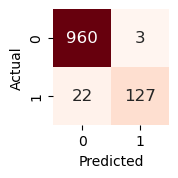

In [80]:
# Compute the confusion matrix to evaluate the performance of the Logistic Regression model
cm_reg_log_filtered_sw = confusion_matrix(y_test_filtered_sw, y_pred_reg_log_filtered_sw)

df_cm_reg_log_filtered_sw = pd.DataFrame(cm_reg_log_filtered_sw, columns=np.unique(y_test), index = np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm_reg_log_filtered_sw.index.name = 'Actual'
df_cm_reg_log_filtered_sw.columns.name = 'Predicted'

# Create a new figure for the heatmap
plt.figure(figsize = (1.5,1.5))

# Generate the heatmap visualization
sb.heatmap(df_cm_reg_log_filtered_sw, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

plt.show()

#### Discussion of Removing Stop Words

The model's performance did not improve after removing stop words. There could be several reasons why this happened:

- The dataset might not heavily rely on stop words for classification.
- Removing stop words might not have reduced the feature space significantly enough to improve model performance.

### 2. Scaling

- Afterwards, decided to use scaling, particularly min-max scaling, with Logistic Regression because it performs better when features are on a similar scale. Min-max scaling was chosen because the data distribution is not Gaussian (not normal).
- If features are on different scales (e.g., one feature ranges from 0 to 1000 and another from 0 to 10), features with larger scales can dominate the model's learning process. Scaling ensures that all features are transformed to a similar scale, preventing this dominance and allowing the model to learn from each feature more uniformly.
- Besides, scaling ensures that the optimization process converges more quickly and efficiently, leading to faster training times.

#### Min-Max Scaler

In [81]:
# Initialize MinMaxScaler for scaling features to a specified range (default is [0, 1])
min_max_scaler = preprocessing.MinMaxScaler()

In [82]:
# Fit and transform the training data using MinMaxScaler to scale features to [0, 1]
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
# Transform the test data using the MinMaxScaler fitted on X_train
X_test_minmax = min_max_scaler.fit_transform(X_test)
X_test_minmax

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.07142857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Apply Logistic Regression

In [84]:
# Initialize Logistic Regression with MinMax scaled data
reg_log_minmax = LogisticRegression(random_state=42, max_iter=1000)
reg_log_minmax.fit(X_train_minmax, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [85]:
# Predict using the logistic regression model with MinMax scaled test data
y_pred_reg_log_minmax = reg_log_minmax.predict(X_test_minmax)

In [86]:
# Print classification report to evaluate model performance
print("Classification report: ")
print(classification_report(y_test, y_pred_reg_log_minmax))

Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       963
           1       0.98      0.86      0.92       149

    accuracy                           0.98      1112
   macro avg       0.98      0.93      0.95      1112
weighted avg       0.98      0.98      0.98      1112



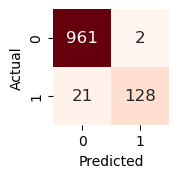

In [87]:
# Compute and print confusion matrix to assess model performance
cm_reg_log_minmax = confusion_matrix(y_test, y_pred_reg_log_minmax)

# Create a DataFrame from confusion matrix for visualization
df_cm_reg_log_minmax = pd.DataFrame(cm_reg_log_minmax, columns=np.unique(y_test), index=np.unique(y_test))

# Set the names for the DataFrame's index (rows) and columns
df_cm_reg_log_minmax.index.name = 'Actual'
df_cm_reg_log_minmax.columns.name = 'Predicted'

# Create a new figure for the heatmap visualization
plt.figure(figsize=(1.5, 1.5))

# Generate the heatmap using Seaborn
sb.heatmap(df_cm_reg_log_minmax, annot=True, annot_kws={"size": 12}, cbar=False, square=True, fmt="d", cmap="Reds")

# Display the heatmap
plt.show()

#### Discussion of the Performance after Using Min-Max Scaling

The model's performance did not improve after Min-Max Scaling

---

## VII.- Models Comparision

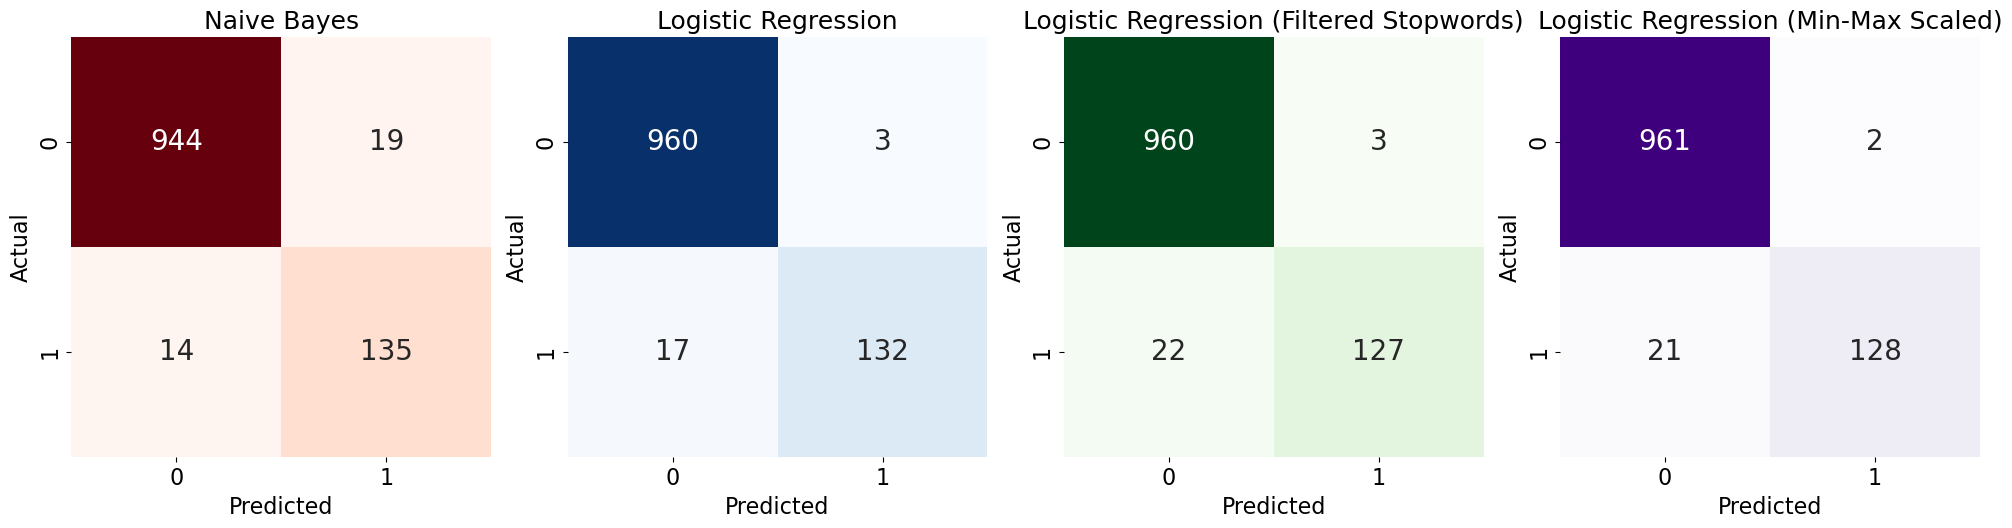

In [88]:
# Create figure for the heatmaps
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Heatmap for Naive Bayes
sb.heatmap(df_cm_nb, annot=True, annot_kws={"size": 20}, cbar=False, square=True, fmt="d", cmap="Reds", ax=axs[0])
axs[0].set_title('Naive Bayes', fontsize=18)
axs[0].set_xlabel('Predicted', fontsize=16)
axs[0].set_ylabel('Actual', fontsize=16)
axs[0].tick_params(axis='both', which='major', labelsize=16)

# Heatmap for Logistic Regression
sb.heatmap(df_cm_reg_log, annot=True, annot_kws={"size": 20}, cbar=False, square=True, fmt="d", cmap="Blues", ax=axs[1])
axs[1].set_title('Logistic Regression', fontsize=18)
axs[1].set_xlabel('Predicted', fontsize=16)
axs[1].set_ylabel('Actual', fontsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)

# Heatmap for Logistic Regression on Filtered Stopwords
sb.heatmap(df_cm_reg_log_filtered_sw, annot=True, annot_kws={"size": 20}, cbar=False, square=True, fmt="d", cmap="Greens", ax=axs[2])
axs[2].set_title('Logistic Regression (Filtered Stopwords)', fontsize=18)
axs[2].set_xlabel('Predicted', fontsize=16)
axs[2].set_ylabel('Actual', fontsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)

# Heatmap for Logistic Regression on Min-Max Scaled Features
sb.heatmap(df_cm_reg_log_minmax, annot=True, annot_kws={"size": 20}, cbar=False, square=True, fmt="d", cmap="Purples", ax=axs[3])
axs[3].set_title('Logistic Regression (Min-Max Scaled)', fontsize=18)
axs[3].set_xlabel('Predicted', fontsize=16)
axs[3].set_ylabel('Actual', fontsize=16)
axs[3].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

*   In conclusion, neither Stopwords nor Min-max contributed to improving performance of the logistic regression model




---

## VIII.- Cross-Validation
- Cross-validation is a technique used to evaluate the performance of a model by dividing the data into multiple subsets, training the model on some subsets, and testing it on the remaining subsets.
- This process is repeated several times to ensure the model's effectiveness and to prevent overfitting.

In [89]:
# Apply MinMax scaling to the feature matrix X
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.5       , 0.07142857, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.07142857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [90]:
# Create a Logistic Regression model with specified parameters
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Perform cross-validation on the MinMax scaled data X_minmax and target y
reg_log_minmax_scores = cross_val_score(log_reg, X_minmax, y, cv=5, scoring='accuracy')

# Print the mean accuracy of cross-validation scores for Logistic Regression with MinMax scaling
print("Logistic Regression Minmax CV Accuracy: ", reg_log_minmax_scores.mean())

Logistic Regression Minmax CV Accuracy:  0.9800319240557149


#### Discussion on the Cross-Validation

- The "Logistic Regression Minmax CV Accuracy: 0.979672049938807" represents the average accuracy of a Logistic Regression model trained on data that has been scaled using MinMax scaling, evaluated using 5-fold cross-validation.
- This metric indicates that, on average, the model correctly predicts the class of emails (spam or not spam) about 97.97% of the time across different folds of the dataset.
- This score provides a robust estimate of the model's performance and its ability to generalize to unseen data, accounting for variations in the training and validation subsets used in cross-validation.

---

## IX. Findings and Insights

- Overall, the dataset consists of 5559 emails with features derived from counts of the 7737 most common words, creating a high-dimensional and sparse feature space. Exploratory Data Analysis revealed significant variation in feature values, yet no missing data was present. The label distribution is notably imbalanced, with a higher number of non-spam emails than spam, which can impact model performance by introducing bias towards the majority class.

- Regarding model performance, Multinomial Naive Bayes was effective for text classification but showed a need to reduce false positives in spam detection. Logistic Regression outperformed Naive Bayes across several metrics, including accuracy (0.98 vs. 0.97), precision for spam detection (0.98 vs. 0.88), recall, and F1-score. By conducting feature engineering, removing stop words did not improve model performance, possibly due to its limited impact on the feature space. Applying Min-Max scaling did not enhance performance.

- Cross-validation results showed that Logistic Regression achieved an average accuracy of 97.7% across 5 folds, indicating strong generalization. The model maintained high precision for non-spam emails (0.98) and good recall for spam (0.89), suggesting it retains some generalization capabilities. Future improvements could focus on incorporating more diverse training data and addressing class imbalance more effectively.

- Challenges included the feature independence assumption in Naive Bayes, which might not capture all the complexities of the data. Applied Logistic Regression to address this issue. Further exploration of feature engineering techniques could provide additional benefits. Another challenge was managing class imbalance to avoid bias towards non-spam emails.